In [1]:
import IPython
import IPython.display 
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

In [2]:
df = pd.read_csv('./CSI_Preprocessing/output/zero4_outputs.csv')
df = df.drop([df.columns[0]], axis='columns') 
df = df.iloc[:,:-3]
df.reset_index(drop=True, inplace=True)
# unit='s' to convert it into epoch time
df['Time'] = pd.to_datetime(df['Time'])
  
date_time = df['Time'].dt.strftime('%S')


# checking our dataframe once again
df.head()

,Time,Subcar_0,Subcar_1,Subcar_2,Subcar_3,Subcar_4,Subcar_5,Subcar_6,Subcar_7,Subcar_8,...,Subcar_52,Subcar_53,Subcar_54,Subcar_55,Subcar_56,Subcar_57,Subcar_58,Subcar_59,Subcar_60,Subcar_61
0,1970-01-01 00:00:01.641598541,5499.938181,7461.867126,6230.129694,8741.921642,297.127919,327.200244,362.527240,353.411941,351.432782,...,437.649403,412.093436,393.782935,396.807258,398.600050,399.450873,405.544079,402.951610,372.625818,343.914233
1,1970-01-01 00:00:01.641598542,5499.938181,7461.867126,6230.129694,8741.921642,350.910245,340.565706,338.013313,332.434956,327.232333,...,367.766230,339.484904,339.087009,343.083080,343.739727,346.943799,351.039884,350.000000,353.509547,361.763735
2,1970-01-01 00:00:01.641598543,5499.938181,7461.867126,6230.129694,8741.921642,357.572370,389.307077,421.911128,424.001179,447.754397,...,466.309983,418.119600,397.935924,387.985824,371.260017,354.983098,338.710791,315.483756,278.195974,245.790561
3,1970-01-01 00:00:01.641598544,5499.938181,7461.867126,6230.129694,8741.921642,507.385455,518.653063,533.348854,545.424605,542.492396,...,459.243944,413.706418,406.503383,392.998728,389.802514,381.072172,390.508643,384.002604,387.497097,393.782935
4,1970-01-01 00:00:01.641598545,5499.938181,7461.867126,6230.129694,8741.921642,379.117396,397.553770,415.226444,450.480854,445.583887,...,653.314626,626.906692,633.941638,639.366092,651.254942,668.481862,671.060355,670.391677,646.208945,616.507096


In [3]:
df['Time'] = pd.to_datetime(df['Time'], infer_datetime_format=True)

In [4]:
df[['Time','Subcar_6', 'Subcar_7','Subcar_9','Subcar_10', 'Subcar_11', 'Subcar_13' ]]

,Time,Subcar_6,Subcar_7,Subcar_9,Subcar_10,Subcar_11,Subcar_13
0,1970-01-01 00:00:01.641598541,362.527240,353.411941,353.793725,347.315419,349.905702,396.717784
1,1970-01-01 00:00:01.641598542,338.013313,332.434956,319.820262,315.317301,310.386855,328.671569
2,1970-01-01 00:00:01.641598543,421.911128,424.001179,441.279956,441.367194,461.677377,500.372861
3,1970-01-01 00:00:01.641598544,533.348854,545.424605,562.694411,538.674299,580.400724,644.920150
4,1970-01-01 00:00:01.641598545,415.226444,450.480854,458.423385,479.883319,511.391240,571.505031
...,...,...,...,...,...,...,...
3797,1970-01-01 00:00:01.641600114,369.043358,395.349213,424.067212,424.067212,418.001196,500.225949
3798,1970-01-01 00:00:01.641600114,362.663756,381.077420,404.853060,412.941885,438.744801,487.332535
3799,1970-01-01 00:00:01.641600114,366.771046,382.334932,423.207987,414.663719,422.454731,509.008841
3800,1970-01-01 00:00:01.641600114,274.614275,282.081548,320.923667,345.648666,368.110038,438.985193


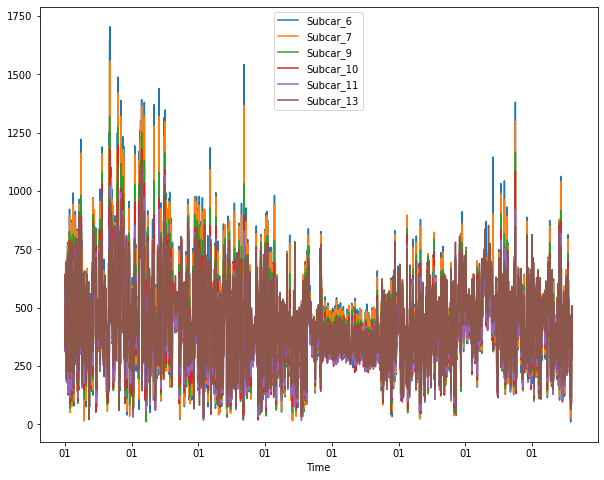

In [5]:
plot_cols = ['Subcar_6', 'Subcar_7','Subcar_9','Subcar_10', 'Subcar_11', 'Subcar_13']
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=False)

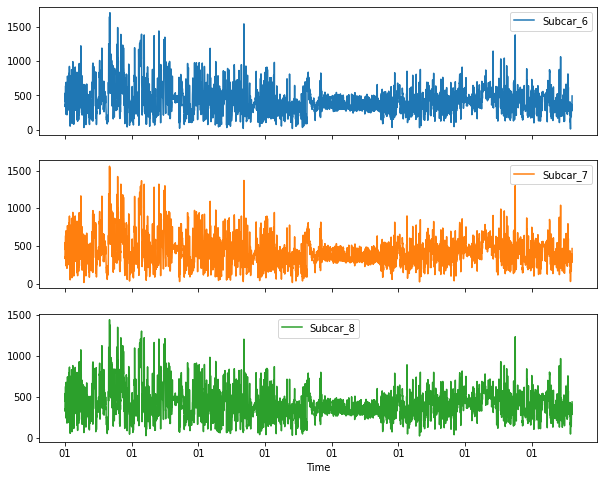

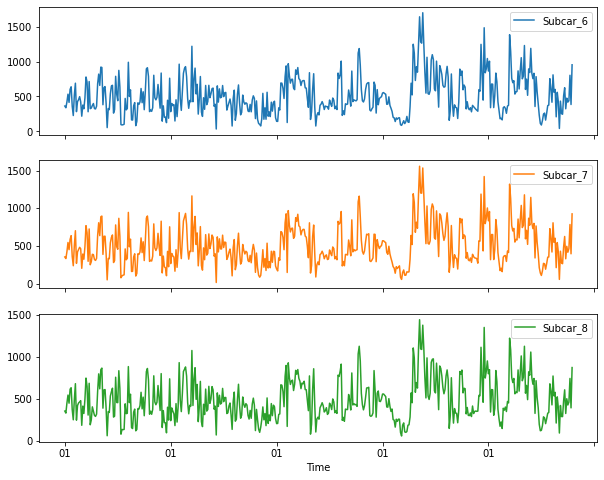

In [6]:
plot_cols = ['Subcar_6', 'Subcar_7', 'Subcar_8']
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

plot_features = df[plot_cols][:480]
plot_features.index = date_time[:480]
_ = plot_features.plot(subplots=True)

In [7]:
df.count()

Time         3802
Subcar_0     3802
Subcar_1     3802
Subcar_2     3802
Subcar_3     3802
             ... 
Subcar_57    3802
Subcar_58    3802
Subcar_59    3802
Subcar_60    3802
Subcar_61    3802
Length: 62, dtype: int64

In [8]:
df = df.set_index('Time')

# Print the summary statistics of the DataFrame
print(df.describe())

          Subcar_0     Subcar_1     Subcar_2     Subcar_3     Subcar_4  \
count  3802.000000  3802.000000  3802.000000  3802.000000  3802.000000   
mean   5482.579092  7455.158794  6233.369403  8730.690589   437.319876   
std     308.541115   114.541341    63.095344   167.604655   494.960094   
min       0.000000  5499.938181  6230.129694  6230.129694     6.000000   
25%    5499.938181  7461.867126  6230.129694  8741.921642   277.672016   
50%    5499.938181  7461.867126  6230.129694  8741.921642   379.214319   
75%    5499.938181  7461.867126  6230.129694  8741.921642   502.360386   
max    5499.938181  7461.867126  7461.867126  8741.921642  8741.921642   

          Subcar_5     Subcar_6     Subcar_7     Subcar_8     Subcar_9  ...  \
count  3802.000000  3802.000000  3802.000000  3802.000000  3802.000000  ...   
mean    418.955691   422.932055   422.431979   413.767333   410.627681  ...   
std     208.937454   202.453002   193.543158   181.690717   171.775869  ...   
min       4.24264

In [9]:
features = df[['Subcar_6', 'Subcar_7','Subcar_9','Subcar_10', 'Subcar_11', 'Subcar_13']].to_numpy().tolist()
target= df['Subcar_7'].tolist()

In [10]:
multi_target = pd.concat([
    df['Subcar_7'],
    df['Subcar_7'].shift(-1),
    df['Subcar_7'].shift(-2) ]
    ,axis=1
).dropna().to_numpy().tolist()

In [11]:
# Hopping window
ts_generator_2 = TimeseriesGenerator(features[:-2], multi_target, length=6, sampling_rate=1, batch_size=1, stride=6)

In [12]:
ts_generator_2[0]

(array([[[362.52724036, 353.41194094, 353.79372521, 347.3154186 ,
          349.90570158, 396.71778382],
         [338.01331335, 332.43495604, 319.82026202, 315.31730051,
          310.38685539, 328.67156859],
         [421.91112808, 424.00117924, 441.27995649, 441.36719407,
          461.67737653, 500.37286097],
         [533.34885394, 545.42460524, 562.69441085, 538.67429863,
          580.40072364, 644.9201501 ],
         [415.22644424, 450.4808542 , 458.42338509, 479.88331915,
          511.39123966, 571.5050306 ],
         [602.84409261, 587.74909613, 601.23955292, 597.50146443,
          612.31527827, 648.39879704]]]),
 array([[635.82466137, 360.18883936, 237.11811403]]))

In [17]:
ts_generator_2[1]

(array([[[639.42552342, 635.82466137, 631.70879367, 623.77319596,
          629.22174152, 692.78856804],
         [359.30070971, 360.18883936, 373.25058607, 373.80476187,
          365.99043703, 413.24084987],
         [226.12607103, 237.11811403, 262.20793276, 263.91096984,
          267.91789787, 307.156312  ],
         [521.02399177, 507.60713155, 473.00105708, 463.49217901,
          439.76925768, 471.44458847],
         [691.11287067, 701.48556649, 677.78462656, 655.33197694,
          646.69389977, 689.84418531],
         [282.02836737, 268.51629373, 233.11799587, 229.61271742,
          184.2009772 , 192.62658176]]]),
 array([[421.52105523, 450.78154354, 481.65651662]]))

In [19]:
x_train, x_test, y_train, y_test = train_test_split(features, multi_target, test_size=0.20, random_state=120, shuffle= False)
print('X_train.shape: ', x_train.shape)
print('X_test.shape: ', x_test.shape)

In [20]:
win_length = 144 # 1 day = 144 of data, 5 day = 720 of data
batch_size = 32
num_features = 6 
train_generator =  tf.keras.preprocessing.sequence.TimeseriesGenerator(x_train, y_train, length=win_length, sampling_rate=1, batch_size=batch_size)
test_generator =  tf.keras.preprocessing.sequence.TimeseriesGenerator(x_test, y_test, length=win_length, sampling_rate=1, batch_size=batch_size)

NameError: name 'x_train' is not defined

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(128, input_shape=(win_length, num_features), return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.LSTM(128, return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.LSTM(64, return_sequences=False))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(1))
model.summary()